In [48]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import ModelCheckpoint
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

Загрузка данных

In [49]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Вывод 2-ух экземпляров каждого класса

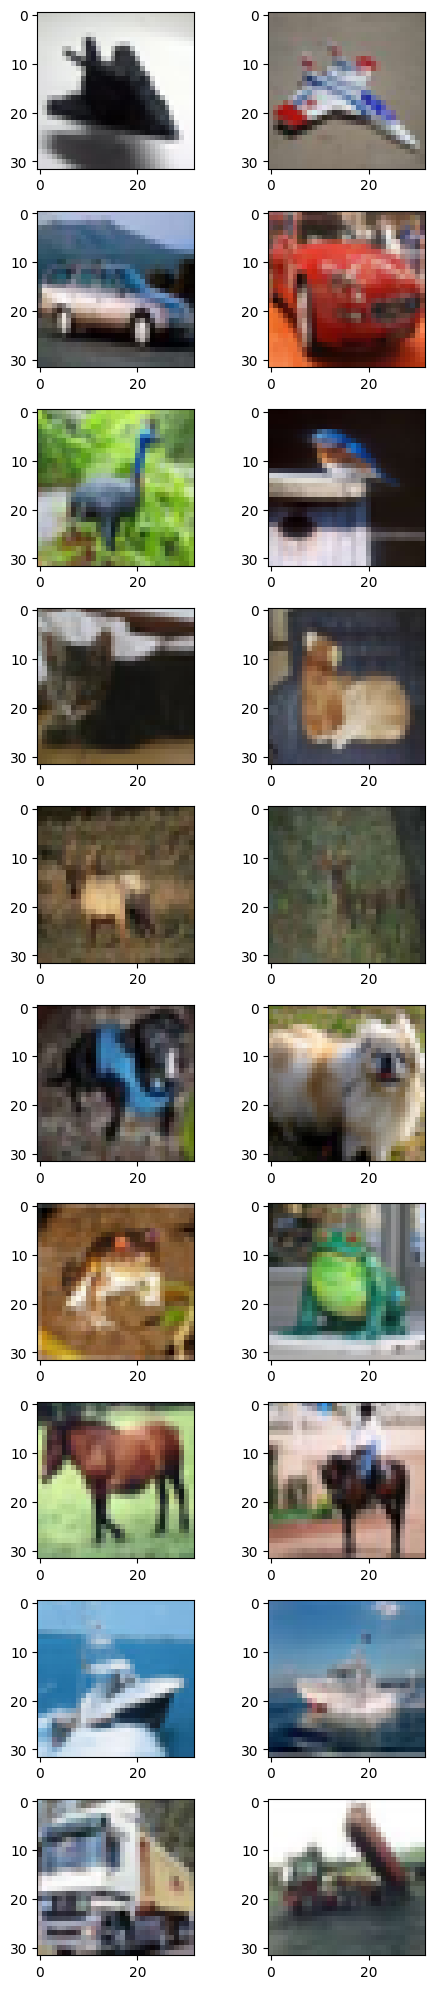

In [50]:
plt.figure(figsize=(5, 20))
for i in range(10):
  neded_indx = np.where(y_train == i)[0]
  plt.subplot(10, 2, i * 2 + 1)
  plt.imshow(x_train[neded_indx[0]])
  plt.subplot(10, 2, i * 2 + 2)
  plt.imshow(x_train[neded_indx[1]])
plt.tight_layout()
plt.show()

In [51]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [52]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [53]:
tf.keras.backend.clear_session()
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath="best_model.keras", save_best_only=True)

history = model.fit(x_train, y_train_cat,
                    epochs=20,
                    validation_split=0.2,
                    callbacks=[checkpoint])

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.3197 - loss: 1.8253 - val_accuracy: 0.5471 - val_loss: 1.2774
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.5468 - loss: 1.2749 - val_accuracy: 0.6049 - val_loss: 1.1318
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6062 - loss: 1.1057 - val_accuracy: 0.6248 - val_loss: 1.0756
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6510 - loss: 0.9913 - val_accuracy: 0.6687 - val_loss: 0.9425
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6811 - loss: 0.9037 - val_accuracy: 0.6798 - val_loss: 0.9143
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6947 - loss: 0.8579 - val_accuracy: 0.7037 - val_loss: 0.8574
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7242 - loss: 0.7855 - val_accuracy: 0.7048 - val_loss: 0.8513
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7397 - loss: 0.7445 - 

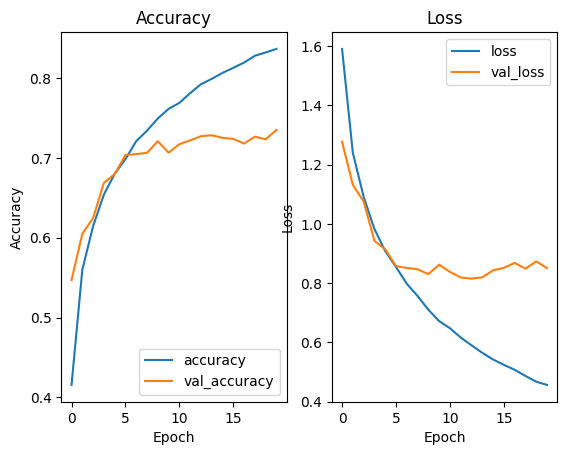

Model train accuracy: 0.8365
Model val accuracy: 0.7351
Model loss: 0.4560
Model val loss: 0.8506


In [54]:
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()
print(f"Model train accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Model val accuracy: {history.history['val_accuracy'][-1]:.4f}")
print(f"Model loss: {history.history['loss'][-1]:.4f}")
print(f"Model val loss: {history.history['val_loss'][-1]:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7371 - loss: 0.7992
Test accuracy: 0.7299
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


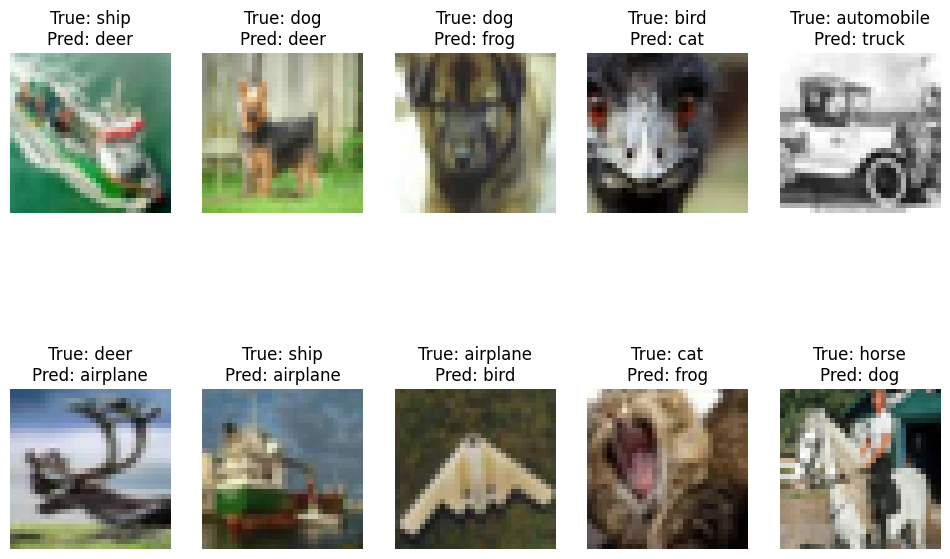

Accuracy for airplane: 0.8010
Accuracy for automobile: 0.8550
Accuracy for bird: 0.5960
Accuracy for cat: 0.5300
Accuracy for deer: 0.6700
Accuracy for dog: 0.6510
Accuracy for frog: 0.8500
Accuracy for horse: 0.6700
Accuracy for ship: 0.8360
Accuracy for truck: 0.8400


In [55]:
model.load_weights("best_model.keras")
test_loss, test_accuracy = model.evaluate(x_test, y_test_cat)
print(f'Test accuracy: {test_accuracy:.4f}')

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

def plot_incorrect_predictions(x_test, y_test, y_pred_classes):
    incorrect_indices = np.where(y_pred_classes != y_test.flatten())[0]
    plt.figure(figsize=(12, 8))
    for i in range(min(len(incorrect_indices), 10)):
        idx = incorrect_indices[i]
        plt.subplot(2, 5, i + 1)
        plt.imshow(x_test[idx])
        plt.title(f'True: {classes[y_test[idx][0]]}\nPred: {classes[y_pred_classes[idx]]}')
        plt.axis('off')
    plt.show()

plot_incorrect_predictions(x_test, y_test, y_pred_classes)

class_accuracy = {}
for i in range(10):
    class_indices = np.where(y_test.flatten() == i)[0]
    correct_predictions = np.sum(y_pred_classes[class_indices] == i)
    class_accuracy[classes[i]] = correct_predictions / len(class_indices) if len(class_indices) > 0 else 0

for class_name in classes:
    print(f'Accuracy for {class_name}: {class_accuracy[class_name]:.4f}')

Подготовка к обучению на 8 классах

In [56]:
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

classes_to_remove = [0, 1]
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
mask_train = ~np.isin(y_train, classes_to_remove).flatten()
mask_test = ~np.isin(y_test, classes_to_remove).flatten()

x_train_8 = x_train[mask_train]
y_train_8 = y_train_cat[mask_train][:, 2:]
x_test_8 = x_test[mask_test]
y_test_8 = y_test_cat[mask_test][:, 2:]

base_model = Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(8, activation='softmax')
])

base_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_base = base_model.fit(x_train_8, y_train_8, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.3519 - loss: 1.6829 - val_accuracy: 0.5431 - val_loss: 1.2373
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5774 - loss: 1.1654 - val_accuracy: 0.6210 - val_loss: 1.0516
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6349 - loss: 1.0195 - val_accuracy: 0.6077 - val_loss: 1.1088
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6685 - loss: 0.9142 - val_accuracy: 0.6629 - val_loss: 0.9408
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7055 - loss: 0.8284 - val_accuracy: 0.6721 - val_loss: 0.9287
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7382 - loss: 0.7540 - val_accuracy: 0.7029 - val_loss: 0.8558
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7602 - loss: 0.6818 - val_accuracy: 0.7185 - val_loss: 0.8168
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7775 - loss: 0.6332 - val_accuracy: 0.

In [57]:
def class_accuracy(model, x_data, y_data, num_classes):
    predictions = model.predict(x_data)
    y_true = np.argmax(y_data, axis=1)
    y_pred = np.argmax(predictions, axis=1)
    accuracies = []
    for i in range(num_classes):
        mask = (y_true == i)
        correct = np.sum(y_pred[mask] == y_true[mask])
        total = np.sum(mask)
        accuracies.append(correct / total if total > 0 else 0.0)
    return accuracies


base_accuracies = class_accuracy(base_model, x_test_8, y_test_8, 8)
print("Точность по классам (Base Model):")
for i, acc in enumerate(base_accuracies):
    print(f"Класс {i + 2}: {acc:.2f}")

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Точность по классам (Base Model):
Класс 2: 0.66
Класс 3: 0.51
Класс 4: 0.69
Класс 5: 0.55
Класс 6: 0.89
Класс 7: 0.65
Класс 8: 0.93
Класс 9: 0.81


In [58]:
base_model.pop()
base_model.pop()
base_model.trainable = False

new_model = Sequential([
    base_model,
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])


In [59]:
new_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_new = new_model.fit(x_train, y_train_cat, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.4898 - loss: 0.0000e+00 - val_accuracy: 0.6676 - val_loss: 0.0000e+00
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6808 - loss: 0.0000e+00 - val_accuracy: 0.6762 - val_loss: 0.0000e+00
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7129 - loss: 0.0000e+00 - val_accuracy: 0.6870 - val_loss: 0.0000e+00
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7312 - loss: 0.0000e+00 - val_accuracy: 0.6886 - val_loss: 0.0000e+00
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7453 - loss: 0.0000e+00 - val_accuracy: 0.6928 - val_loss: 0.0000e+00
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7441 - loss: 0.0000e+00 - val_accuracy: 0.6912 - val_loss: 0.0000e+00
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7548 - loss: 0.0000e+00 - val_accuracy: 0.6942 - val_loss: 0.0000e+00
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/s

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6954 - loss: 0.0000e+00
Точность на тестовых данных: 0.6930


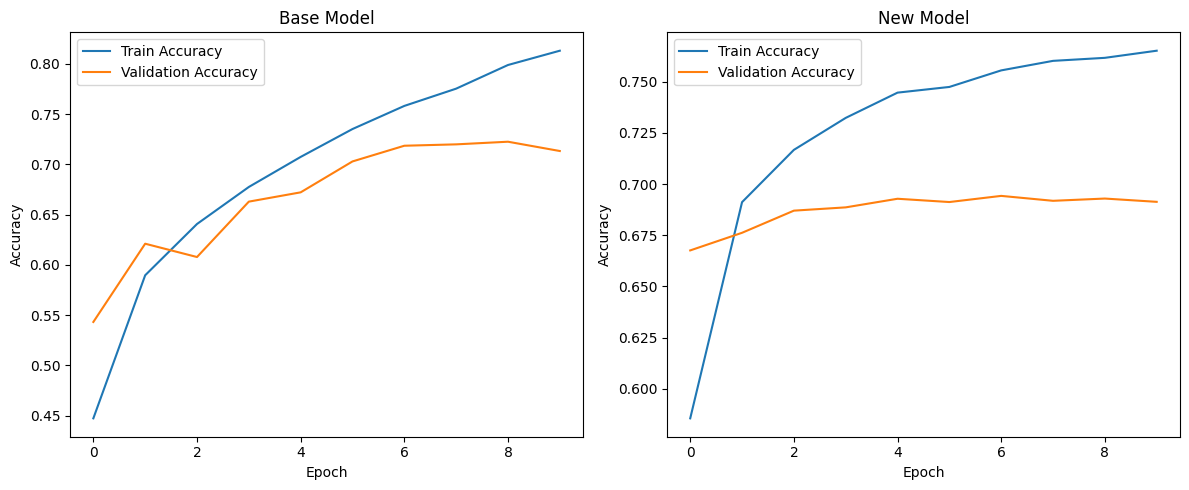

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Точность по классам (New Model):
Класс airplane: 0.6810
Класс automobile: 0.7320
Класс bird: 0.6250
Класс cat: 0.5960
Класс deer: 0.6290
Класс dog: 0.5430
Класс frog: 0.8050
Класс horse: 0.7700
Класс ship: 0.7990
Класс truck: 0.7500


In [60]:
accuracy_1 = new_model.evaluate(x_test, y_test_cat)[3]
print(f"Точность на тестовых данных: {accuracy_1:.4f}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_base.history['accuracy'], label='Train Accuracy')
plt.plot(history_base.history['val_accuracy'], label='Validation Accuracy')
plt.title('Base Model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_new.history['accuracy'], label='Train Accuracy')
plt.plot(history_new.history['val_accuracy'], label='Validation Accuracy')
plt.title('New Model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

new_accuracies = class_accuracy(new_model, x_test, y_test_cat, 10)
print("Точность по классам (New Model):")
for i, acc in enumerate(new_accuracies):
    print(f"Класс {classes[i]}: {acc:.4f}")